In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import tqdm 
from catboost import CatBoostRegressor

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [2]:
RANDOM_SEED = 42

In [30]:
df2 = pd.read_csv('C:/Users/tsald/all_car_merget_12_05/all_car_merget_12_05.csv',encoding = "utf_8")
df2.head(10)

c:\users\tsald\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (198) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,AUX,Android Auto,Bluetooth,CarPlay,USB,VIN,availability,bodyType,brand,car_name,...,Электрорегулировка задних сидений,Электрорегулировка передних сидений,Электрорегулировка руля,Электрорегулировка сиденья водителя,Электроскладывание зеркал,Электростеклоподъёмники задние,Электростеклоподъёмники передние,Юридическая чистота,Яндекс.Авто,год выпуска
0,1.0,NaN,NaN,NaN,NaN,WBA**************,http://schema.org/InStock,купе,BMW,BMW 6 серия II (E63/E64) 645i,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ограничений и залогов не найдено,NaN,2004.0
1,NaN,NaN,NaN,NaN,NaN,XUF**************,http://schema.org/InStock,седан,CHEVROLET,Chevrolet Cruze I Рестайлинг,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Ограничений и залогов не найдено,NaN,2013.0
2,NaN,NaN,1.0,NaN,1.0,XW8**************,http://schema.org/InStock,внедорожник 5 дв.,VOLKSWAGEN,Volkswagen Tiguan I Рестайлинг,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,Ограничений и залогов не найдено,NaN,2016.0
3,1.0,NaN,NaN,NaN,1.0,KMH**************,http://schema.org/InStock,внедорожник 5 дв.,HYUNDAI,Hyundai Tucson I,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,Ограничений и залогов не найдено,NaN,2008.0
4,1.0,NaN,NaN,NaN,NaN,SAJ**************,http://schema.org/InStock,седан,JAGUAR,Jaguar XJ LWB II (X308) Sovereign LWB,...,NaN,1.0,1.0,NaN,NaN,1.0,1.0,Ограничений и залогов не найдено,NaN,1999.0
5,1.0,NaN,1.0,NaN,1.0,YV1**************,http://schema.org/InStock,седан,VOLVO,Volvo S40 II,...,NaN,1.0,NaN,NaN,1.0,1.0,1.0,Ограничений и залогов не найдено,NaN,2007.0
6,1.0,NaN,1.0,NaN,NaN,X4X**************,http://schema.org/InStock,седан,BMW,BMW 5 серия VI (F10/F11/F07) 528i xDrive,...,NaN,1.0,NaN,NaN,1.0,1.0,1.0,Ограничений и залогов не найдено,NaN,2013.0
7,NaN,NaN,NaN,NaN,NaN,VF3**************,http://schema.org/InStock,хэтчбек 5 дв.,PEUGEOT,Peugeot 107 I Рестайлинг,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Ограничений и залогов не найдено,NaN,2009.0
8,NaN,NaN,NaN,NaN,NaN,XUF**************,http://schema.org/InStock,внедорожник 5 дв.,CHEVROLET,Chevrolet Captiva I,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,Ограничений и залогов не найдено,NaN,2008.0
9,NaN,NaN,NaN,NaN,NaN,XWB**************,http://schema.org/InStock,хэтчбек 5 дв.,CHEVROLET,Chevrolet Spark III,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ограничений и залогов не найдено,NaN,2013.0


In [12]:
df2.columns.to_list()


['AUX',
 'Android Auto',
 'Bluetooth',
 'CarPlay',
 'USB',
 'VIN',
 'availability',
 'bodyType',
 'brand',
 'car_name',
 'color',
 'description',
 'engineDisplacement',
 'enginePower',
 'fuelType',
 'image',
 'images_counter',
 'img_list',
 'modelDate',
 'name',
 'numberOfDoors',
 'price',
 'priceCurrency',
 'productionDate',
 'public_date',
 'saler_name',
 'saler_type',
 'top_url_body',
 'top_url_mark',
 'top_url_model',
 'top_url_name',
 'top_url_series',
 'url',
 'vehicleConfiguration',
 'vehicleTransmission',
 'views',
 'Автоматический корректор фар',
 'Адаптивный круиз-контроль',
 'Активная подвеска',
 'Активный усилитель руля',
 'Алькантара (Материал салона)',
 'Антиблокировочная система (ABS)',
 'Антипробуксовочная система (ASR)',
 'Аудиоподготовка',
 'Аудиосистема',
 'Аудиосистема Hi-Fi',
 'Аудиосистема с TV',
 'Аэрография',
 'Беспроводная зарядка для смартфона',
 'Блокировка замков задних дверей',
 'Бортовой компьютер',
 'Бронированный кузов',
 'Велюр (Материал салона)',
 'Вен

In [41]:
df_opt = df2[df2.price < 1500000]

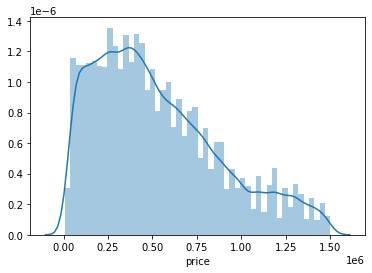

In [48]:
sns.distplot(df_opt.price)

In [34]:
df_opt.shape

(80911, 229)

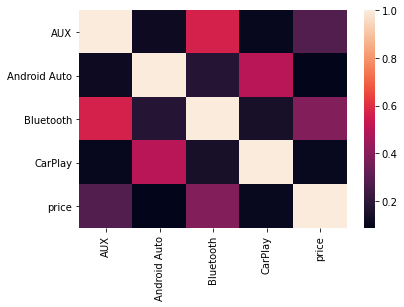

In [54]:
sns.heatmap(df_opt[['AUX','Android Auto','Bluetooth','CarPlay','price']].corr())


In [42]:
# NaN для этого отфильтровывам признаки с объектами и оставляем только с float64 затем смотрим есть ли в них NaN
# и заменяем их нулями
binary_columns = []

binary_columns_1 = []
binary_columns_2 = []
binary_columns_3 = []
binary_columns_4 = []
binary_columns_5 = []
binary_columns_6 = []
binary_columns_7 = []
binary_columns_8 = []
binary_columns_9 = []
binary_columns_10 = []

binary_columns = [binary_columns_1,binary_columns_2,binary_columns_3,binary_columns_4,
                  binary_columns_5,binary_columns_6,binary_columns_7,binary_columns_8,
                  binary_columns_9,binary_columns_10]
i = 0
for column in df_opt.columns:
     if df_opt[column].dtype == 'float64':
         if df_opt[column].value_counts().shape[0] == 1:
              if df_opt[column][df_opt[column].isna() == True].shape[0] > 0:
                 if i < 18:
                    binary_columns_1.append(column)
                    print(i)
                 elif i>=18 and i<36:
                    binary_columns_2.append(column)
                 elif i>=36 and i<54:
                    binary_columns_3.append(column)
                 elif i>=54 and i<72:
                    binary_columns_4.append(column)
                 elif i>=72 and i<90:
                    binary_columns_5.append(column)
                 elif i>=90 and i<108:
                    binary_columns_6.append(column)
                 elif i>=108 and i<126:
                    binary_columns_7.append(column)
                 elif i>=126 and i<144:
                    binary_columns_8.append(column)
                 elif i>=144 and i<162:
                    binary_columns_9.append(column)
                 elif i>=162:
                    binary_columns_10.append(column)

                 df_opt[column].fillna(0,inplace=True)
                 i+=1




# sns.clustermap(df_opt[binary_columns].corr())
# plt.tight_layout()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


c:\users\tsald\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [110]:
# for bin in binary_columns:
#     bin.append('price')


In [127]:
binary_columns_10

['Электрообогрев зоны стеклоочистителей',
 'Электрообогрев лобового стекла',
 'Электрообогрев форсунок стеклоомывателей',
 'Электропривод зеркал',
 'Электропривод крышки багажника',
 'Электрорегулировка задних сидений',
 'Электрорегулировка передних сидений',
 'Электрорегулировка руля',
 'Электрорегулировка сиденья водителя',
 'Электроскладывание зеркал',
 'Электростеклоподъёмники задние',
 'Электростеклоподъёмники передние',
 'Яндекс.Авто']

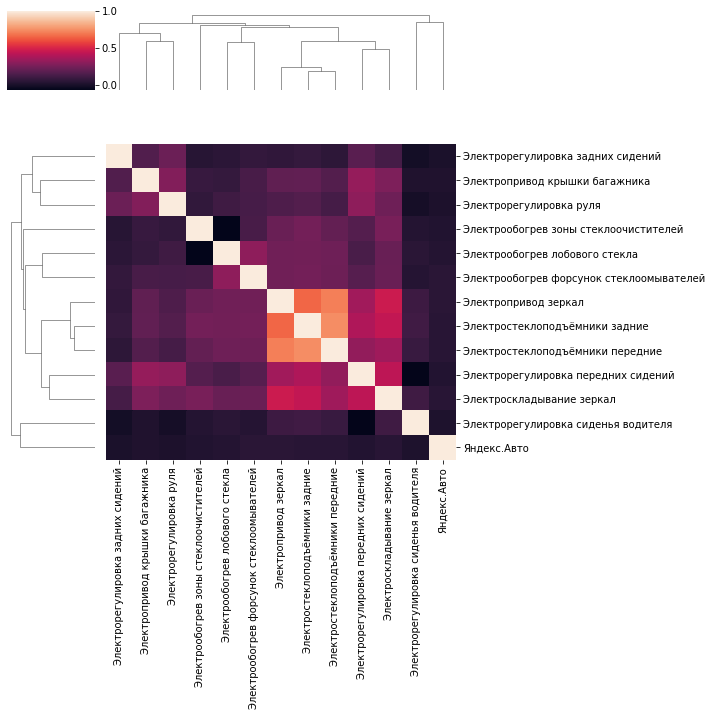

In [15]:
sns.clustermap(df_opt[binary_columns_10].corr())
plt.tight_layout()



In [43]:
X1 = df_opt[binary_columns_1]
X2 = df_opt[binary_columns_2]
X3 = df_opt[binary_columns_3]
X4 = df_opt[binary_columns_4]
X5 = df_opt[binary_columns_5]
X6 = df_opt[binary_columns_6]
X7 = df_opt[binary_columns_7]
X8 = df_opt[binary_columns_8]
X9 = df_opt[binary_columns_9]
X10 = df_opt[binary_columns_10]

y = df_opt.price

array_compl_col = [X1,X2,X3,X4,X5,X6,X7,X8,X9,X10]

In [17]:
test = SelectKBest(score_func=chi2, k=4)

In [44]:
array_max_corr =[]
for i in array_compl_col:
    fit = test.fit(i, y)
    np.set_printoptions(precision=3)
    # print(fit.scores_)
    x = np.array(fit.scores_)
    max_corr = np.argsort(x)[::-1][:4]
    array_max_corr.append(max_corr)


# features = fit.transform(X)
# print(features[0:5,:])

In [19]:
array_max_corr

[array([ 2, 11,  5, 10], dtype=int64),
 array([11,  9, 16,  8], dtype=int64),
 array([10, 15, 17,  4], dtype=int64),
 array([ 7,  2, 17,  5], dtype=int64),
 array([ 9,  1, 14, 13], dtype=int64),
 array([17,  6, 15,  5], dtype=int64),
 array([ 6,  4, 11,  5], dtype=int64),
 array([14, 10,  5,  1], dtype=int64),
 array([17,  8, 10,  0], dtype=int64),
 array([9, 6, 4, 3], dtype=int64)]

In [45]:
#df_max_corr = pd.DataFrame()
k = 0
for j in array_max_corr:
# #     print(j)
       array_compl_col[k] = array_compl_col[k].iloc[:,j]
       k += 1


In [48]:
array_compl_col


[       Bluetooth  Антипробуксовочная система (ASR)  \
 0            0.0                               0.0   
 1            0.0                               0.0   
 2            1.0                               0.0   
 3            0.0                               0.0   
 4            0.0                               0.0   
 ...          ...                               ...   
 97775        0.0                               0.0   
 97776        0.0                               0.0   
 97777        0.0                               0.0   
 97778        0.0                               0.0   
 97779        0.0                               0.0   
 
        Автоматический корректор фар  Антиблокировочная система (ABS)  
 0                               1.0                              0.0  
 1                               0.0                              1.0  
 2                               0.0                              1.0  
 3                               0.0              

In [52]:
array_compl_col[9]

,Электроскладывание зеркал,Электрорегулировка передних сидений,Электропривод крышки багажника,Электропривод зеркал
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
97775,0.0,0.0,0.0,0.0
97776,1.0,0.0,0.0,1.0
97777,0.0,0.0,0.0,0.0
97778,0.0,0.0,0.0,0.0


In [147]:
df2['power'] = df2.apply(lambda z : z['name'][(z['name'].find('(')+1):(z['name'].find('л.с.')-1)],axis=1)

In [149]:


# features = fit.transform(X)
# print(features[0:5,:])

[array([ 2, 11,  5, 10], dtype=int64),
 array([11,  9, 16,  8], dtype=int64),
 array([10, 15, 17,  4], dtype=int64),
 array([ 7,  2, 17,  5], dtype=int64),
 array([ 9,  1, 14, 13], dtype=int64),
 array([17,  6, 15,  5], dtype=int64),
 array([ 6,  4, 11,  5], dtype=int64),
 array([14, 10,  5,  1], dtype=int64),
 array([17,  8, 10,  0], dtype=int64),
 array([9, 6, 4, 3], dtype=int64)]

[ 2 11  5 10]
[11  9 16  8]
[10 15 17  4]
[ 7  2 17  5]
[ 9  1 14 13]
[17  6 15  5]
[ 6  4 11  5]
[14 10  5  1]
[17  8 10  0]
[9 6 4 3]


,dt
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
97775,0.0
97776,0.0
97777,1.0
97778,0.0


In [140]:
# model = LogisticRegression()
#
# rfe = RFE(model, 3)
#
# fit_rfe = rfe.fit(X, y)
#
# print("Num Features: %d") % fit_rfe.n_features_
#
# print("Selected Features: %s") % fit_rfe.support_
#
# print("Feature Ranking: %s") % fit_rfe.ranking_

c:\users\tsald\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\tsald\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:760: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KeyboardInterrupt: 

In [5]:
df2['power'] = df2.apply(lambda z : z['name'][(z['name'].find('(')+1):(z['name'].find('л.с.')-1)],axis=1)

In [238]:
df2['numberOfDoors'] = df2.apply(lambda z: int(z['numberOfDoors']),axis = 1)

In [239]:
df2['vehicleConfiguration'] = df2.apply(lambda z: z['vehicleConfiguration'][:z['vehicleConfiguration'].find(' ')], axis = 1)

In [240]:
df2['productionDate'] = df2.apply(lambda z: int(z['productionDate']),axis = 1)

In [241]:
df2 = df2.drop('bodyType',axis = 1)

In [242]:
df2['modelDate'] = df2.apply(lambda z: int(z['modelDate']),axis = 1)

In [243]:
def vtrans(x):
    if x == 'механическая':
        return 1
    elif x == 'автоматическая':
        return 3
    elif x == 'вариатор':
        return 2
    elif x == 'роботизированная':
        return 4
    

In [244]:
df2['vTransmission'] = df2['vehicleTransmission'].apply(vtrans)

In [245]:
df2 = df2.drop('name',axis = 1)

In [246]:
df2 = df2.drop('Таможня',axis = 1)

In [247]:
def vPTS(x):
    if x == 'Оригинал':
        return 2
    elif x == 'Дубликат':
        return 1


In [248]:
df2['ПТС'] = df2['ПТС'].apply(vPTS)

In [249]:
def vConfig(x):
    if x.find('_') > 0:
        return x[:x.find('_')]
    else:
        return x    

In [250]:
df2['vehicleConfiguration'] = df2['vehicleConfiguration'].apply(vConfig)

In [251]:
df2.vehicleConfiguration.value_counts()

ALLROAD       14665
SEDAN         11704
LIFTBACK       3097
HATCHBACK      2634
WAGON          1334
COUPE           860
MINIVAN         801
COMPACTVAN      423
PICKUP          292
CABRIO           58
VAN              55
ROADSTER         48
MICROVAN         15
LIMOUSINE         2
TARGA             2
Name: vehicleConfiguration, dtype: int64

In [252]:
df2.brand.value_counts()

VOLKSWAGEN    3872
AUDI          3837
BMW           3837
TOYOTA        3706
MERCEDES      3671
SKODA         3651
NISSAN        3602
MITSUBISHI    2161
VOLVO         2140
HONDA         1692
LEXUS         1427
INFINITI      1336
SUZUKI        1058
Name: brand, dtype: int64

In [253]:
df2.fuelType.value_counts()

бензин     29568
дизель      6123
гибрид       276
электро       17
газ            6
Name: fuelType, dtype: int64

In [254]:
df2['Привод'].value_counts()

полный      17548
передний    15146
задний       3296
Name: Привод, dtype: int64

In [255]:
df2 = df2.drop('enginePower',axis = 1)

In [256]:
df2 = df2.drop('description',axis = 1)

In [257]:
df2['mileage'] = df2.apply(lambda z: int(z['mileage']),axis = 1)

In [258]:
df2 = df2.drop('Состояние',axis = 1)

In [259]:
df2['Руль'].value_counts()

Левый     35100
Правый      890
Name: Руль, dtype: int64

In [260]:
def own(x):
    if x.find('или') > 0:
        return x[:x.find('или')-1]
    else:
        return x[:x.find('владе')-1]

In [261]:
df2['Владельцы'] = df2['Владельцы'].apply(own)

In [262]:
df2 = df2.drop('Владение',axis = 1)

In [263]:
df2 = df2.drop('id',axis = 1)

In [265]:
df2 = df2.drop(np.where(df2['engineDisplacement'] == 'undefined LTR')[0])

In [268]:
df2['engineDisplacement'] = df2.apply(lambda z: float(z['engineDisplacement'][:z['engineDisplacement'].find('LTR') - 1]), axis = 1)

In [269]:
df2

,brand,color,fuelType,modelDate,numberOfDoors,productionDate,vehicleConfiguration,vehicleTransmission,engineDisplacement,mileage,Комплектация,Привод,Руль,Владельцы,ПТС,power,vTransmission,eDisplacement
0,MERCEDES,синий,бензин,2015,5,2017,ALLROAD,автоматическая,2.0,50000,"['[{""name"":""Безопасность"",""values"":[""Антипробу...",полный,Левый,1,2,211,3,2.0
1,INFINITI,чёрный,бензин,2014,4,2014,SEDAN,автоматическая,3.7,78000,[],полный,Левый,2,2,333,3,3.7
2,NISSAN,белый,бензин,2009,5,2013,HATCHBACK,автоматическая,1.6,98000,"['[{""name"":""Элементы экстерьера"",""values"":[""Ст...",передний,Левый,1,2,110,3,1.6
3,BMW,серый,дизель,2013,5,2016,ALLROAD,автоматическая,3.0,69000,"['[{""name"":""Комфорт"",""values"":[""Круиз-контроль...",полный,Левый,3,2,381,3,3.0
4,MERCEDES,чёрный,бензин,2013,5,2015,ALLROAD,роботизированная,1.6,116473,"['[{""name"":""Элементы экстерьера"",""values"":[""Ле...",передний,Левый,2,2,156,4,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35985,NISSAN,серый,бензин,2007,5,2007,ALLROAD,вариатор,2.0,150000,"['[{""name"":""Комфорт"",""values"":[""Круиз-контроль...",полный,Левый,3,2,140,2,2.0
35986,TOYOTA,белый,дизель,2012,5,2015,ALLROAD,автоматическая,4.5,98000,[],полный,Левый,2,2,235,3,4.5
35987,VOLKSWAGEN,белый,бензин,2009,5,2013,HATCHBACK,роботизированная,1.6,140000,"['[{""name"":""Безопасность"",""values"":[""Подушка б...",передний,Левый,1,2,102,4,1.6
35988,BMW,белый,дизель,2009,5,2012,ALLROAD,автоматическая,2.0,160000,"['[{""name"":""Прочее"",""values"":[""Защита картера""...",полный,Левый,2,2,184,3,2.0


In [270]:
df2 = df2.drop('eDisplacement',axis = 1)

In [271]:
df2

,brand,color,fuelType,modelDate,numberOfDoors,productionDate,vehicleConfiguration,vehicleTransmission,engineDisplacement,mileage,Комплектация,Привод,Руль,Владельцы,ПТС,power,vTransmission
0,MERCEDES,синий,бензин,2015,5,2017,ALLROAD,автоматическая,2.0,50000,"['[{""name"":""Безопасность"",""values"":[""Антипробу...",полный,Левый,1,2,211,3
1,INFINITI,чёрный,бензин,2014,4,2014,SEDAN,автоматическая,3.7,78000,[],полный,Левый,2,2,333,3
2,NISSAN,белый,бензин,2009,5,2013,HATCHBACK,автоматическая,1.6,98000,"['[{""name"":""Элементы экстерьера"",""values"":[""Ст...",передний,Левый,1,2,110,3
3,BMW,серый,дизель,2013,5,2016,ALLROAD,автоматическая,3.0,69000,"['[{""name"":""Комфорт"",""values"":[""Круиз-контроль...",полный,Левый,3,2,381,3
4,MERCEDES,чёрный,бензин,2013,5,2015,ALLROAD,роботизированная,1.6,116473,"['[{""name"":""Элементы экстерьера"",""values"":[""Ле...",передний,Левый,2,2,156,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35985,NISSAN,серый,бензин,2007,5,2007,ALLROAD,вариатор,2.0,150000,"['[{""name"":""Комфорт"",""values"":[""Круиз-контроль...",полный,Левый,3,2,140,2
35986,TOYOTA,белый,дизель,2012,5,2015,ALLROAD,автоматическая,4.5,98000,[],полный,Левый,2,2,235,3
35987,VOLKSWAGEN,белый,бензин,2009,5,2013,HATCHBACK,роботизированная,1.6,140000,"['[{""name"":""Безопасность"",""values"":[""Подушка б...",передний,Левый,1,2,102,4
35988,BMW,белый,дизель,2009,5,2012,ALLROAD,автоматическая,2.0,160000,"['[{""name"":""Прочее"",""values"":[""Защита картера""...",полный,Левый,2,2,184,3


In [292]:
df2['Комплектация'].value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [279]:
y = df2['Комплектация'].loc[5]

In [277]:
type(y)

str

In [280]:
y

'[\'[{"name":"Прочее","values":["Защита картера"]},{"name":"Безопасность","values":["Система стабилизации (ESP)","Подушка безопасности водителя","Крепление детского кресла (задний ряд) ISOFIX","Система помощи при старте в гору (HSA)","Подушка безопасности пассажира","Антиблокировочная система (ABS)"]},{"name":"Мультимедиа","values":["AUX","USB","Аудиосистема","Bluetooth","Розетка 12V"]},{"name":"Комфорт","values":["Электростеклоподъёмники передние","Мультифункциональное рулевое колесо","Прикуриватель и пепельница","Бортовой компьютер","Камера задняя","Активный усилитель руля","Электропривод зеркал","Электростеклоподъёмники задние","Охлаждаемый перчаточный ящик","Регулировка руля по вылету","Регулировка руля по высоте","Климат-контроль 2-зонный"]},{"name":"Обзор","values":["Электрообогрев форсунок стеклоомывателей","Омыватель фар","Противотуманные фары","Датчик дождя","Электрообогрев боковых зеркал"]},{"name":"Салон","values":["Передний центральный подлокотник","Складывающееся заднее си

In [282]:
y[3:-3]

'{"name":"Прочее","values":["Защита картера"]},{"name":"Безопасность","values":["Система стабилизации (ESP)","Подушка безопасности водителя","Крепление детского кресла (задний ряд) ISOFIX","Система помощи при старте в гору (HSA)","Подушка безопасности пассажира","Антиблокировочная система (ABS)"]},{"name":"Мультимедиа","values":["AUX","USB","Аудиосистема","Bluetooth","Розетка 12V"]},{"name":"Комфорт","values":["Электростеклоподъёмники передние","Мультифункциональное рулевое колесо","Прикуриватель и пепельница","Бортовой компьютер","Камера задняя","Активный усилитель руля","Электропривод зеркал","Электростеклоподъёмники задние","Охлаждаемый перчаточный ящик","Регулировка руля по вылету","Регулировка руля по высоте","Климат-контроль 2-зонный"]},{"name":"Обзор","values":["Электрообогрев форсунок стеклоомывателей","Омыватель фар","Противотуманные фары","Датчик дождя","Электрообогрев боковых зеркал"]},{"name":"Салон","values":["Передний центральный подлокотник","Складывающееся заднее сидень

In [283]:
dict2 = eval(y[3:-3])

In [284]:
dict2

({'name': 'Прочее', 'values': ['Защита картера']},
 {'name': 'Безопасность',
  'values': ['Система стабилизации (ESP)',
   'Подушка безопасности водителя',
   'Крепление детского кресла (задний ряд) ISOFIX',
   'Система помощи при старте в гору (HSA)',
   'Подушка безопасности пассажира',
   'Антиблокировочная система (ABS)']},
 {'name': 'Мультимедиа',
  'values': ['AUX', 'USB', 'Аудиосистема', 'Bluetooth', 'Розетка 12V']},
 {'name': 'Комфорт',
  'values': ['Электростеклоподъёмники передние',
   'Мультифункциональное рулевое колесо',
   'Прикуриватель и пепельница',
   'Бортовой компьютер',
   'Камера задняя',
   'Активный усилитель руля',
   'Электропривод зеркал',
   'Электростеклоподъёмники задние',
   'Охлаждаемый перчаточный ящик',
   'Регулировка руля по вылету',
   'Регулировка руля по высоте',
   'Климат-контроль 2-зонный']},
 {'name': 'Обзор',
  'values': ['Электрообогрев форсунок стеклоомывателей',
   'Омыватель фар',
   'Противотуманные фары',
   'Датчик дождя',
   'Электроо